In [181]:
import networkit as nk
import numpy as np
import pandas as pd
import re
from networkit.graphio import BinaryPartitionReader
import matplotlib.pyplot as plt

In [182]:
all_data = pd.read_csv("../results/time.csv", sep=";")
all_data

,Code,Graph,Partition,Flag,Community computation,Nodes computation,GLR computation,Total
0,python,"2expnode(n=5120, m=50000).graph",NaN,2expnode,0.249632,0.810747,19.468141,19.469360
1,python,"2expnode(n=10240, m=50000).graph",NaN,2expnode,0.457549,2.529974,66.076160,66.081450
2,python,"2expnode(n=640, m=50000).graph",NaN,2expnode,0.020755,0.051101,1.059860,1.060017
3,python,"2expnode(n=40960, m=50000).graph",NaN,2expnode,0.757963,20.458904,593.701867,593.732502
4,python,"2expnode(n=2560, m=50000).graph",NaN,2expnode,0.021359,0.394145,7.887121,7.887537
5,python,"2expnode(n=1280, m=50000).graph",NaN,2expnode,0.054334,0.224641,1.643777,1.644040
6,python,"2expnode(n=20480, m=50000).graph",NaN,2expnode,0.588773,7.666712,180.451038,180.457450
7,C++,"2expnode(n=5120, m=50000).graph",NaN,2expnode,0.090647,0.366563,28.803762,28.804764
8,C++,"2expnode(n=10240, m=50000).graph",NaN,2expnode,0.172034,0.634378,92.471686,92.473924
9,C++,"2expnode(n=640, m=50000).graph",NaN,2expnode,0.011232,0.046830,1.276260,1.276348


In [183]:
pattern = r"n=(\d+),\s*m=(\d+)"
all_data["n"] = all_data['Graph'].apply(lambda graph_name: int(re.search(pattern, graph_name).group(1)))
all_data["m"] = all_data['Graph'].apply(lambda graph_name: int(re.search(pattern, graph_name).group(2)))

In [184]:
all_data["deltaNodesComputation"] = all_data["Nodes computation"] - all_data["Community computation"]
all_data["deltaGLR"] = all_data["GLR computation"] - all_data["Nodes computation"]

In [185]:
programming_language = "python"

##### Utility function

In [186]:
def plot_column(df, column_names, num_row=1, num_colum=1, one_ax=False, figsize=(20,8)):
    if one_ax:
        _, axes = plt.subplots(1, 1, figsize=figsize)
    else:
        _, axes = plt.subplots(num_row, num_colum, figsize=figsize)
    for i in range(len(column_names)):
        ax=axes 
        column_name = column_names[i]
        if (num_row, num_colum) != (1,1) and not one_ax:
           ax = axes[i] 
        if not one_ax:
            ax.set_ylabel(column_name)
        df[column_name].plot(marker="o", ax=ax, label=column_name)
    if one_ax:
         axes.legend()
    plt.show()

# Programming Language Comparison

##### Filter results

In [187]:
all_comparison = all_data[ all_data["Flag"] == "2expnode"]

In [188]:
py_comparison = all_comparison[ all_comparison["Code"] == "python"]
py_comparison = py_comparison.drop(columns=["Code", "m"])
cpp_comparison = all_comparison[ all_comparison["Code"] == "C++"]
cpp_comparison = cpp_comparison.drop(columns=["Code", "m"])

comparison = pd.merge(py_comparison, cpp_comparison, how="inner", on=["n", "Graph", "Partition", "Flag"], suffixes=("_py", "_cpp"))
comparison

,Graph,Partition,Flag,Community computation_py,Nodes computation_py,GLR computation_py,Total_py,n,deltaNodesComputation_py,deltaGLR_py,Community computation_cpp,Nodes computation_cpp,GLR computation_cpp,Total_cpp,deltaNodesComputation_cpp,deltaGLR_cpp
0,"2expnode(n=5120, m=50000).graph",NaN,2expnode,0.249632,0.810747,19.468141,19.469360,5120,0.561116,18.657394,0.090647,0.366563,28.803762,28.804764,0.275916,28.437199
1,"2expnode(n=10240, m=50000).graph",NaN,2expnode,0.457549,2.529974,66.076160,66.081450,10240,2.072425,63.546186,0.172034,0.634378,92.471686,92.473924,0.462344,91.837308
2,"2expnode(n=640, m=50000).graph",NaN,2expnode,0.020755,0.051101,1.059860,1.060017,640,0.030346,1.008759,0.011232,0.046830,1.276260,1.276348,0.035598,1.229430
3,"2expnode(n=40960, m=50000).graph",NaN,2expnode,0.757963,20.458904,593.701867,593.732502,40960,19.700940,573.242964,0.386909,4.343140,648.247755,648.258891,3.956231,643.904615
4,"2expnode(n=2560, m=50000).graph",NaN,2expnode,0.021359,0.394145,7.887121,7.887537,2560,0.372787,7.492976,0.057544,0.142087,9.485665,9.486185,0.084543,9.343578
5,"2expnode(n=1280, m=50000).graph",NaN,2expnode,0.054334,0.224641,1.643777,1.644040,1280,0.170307,1.419136,0.035937,0.094207,1.564179,1.564362,0.058270,1.469972
6,"2expnode(n=20480, m=50000).graph",NaN,2expnode,0.588773,7.666712,180.451038,180.457450,20480,7.077939,172.784326,0.265604,1.385899,349.597689,349.602380,1.120295,348.211790


##### Set number of nodes as ID

In [189]:
comparison.set_index("n", inplace=True)
comparison.sort_index(inplace=True)

##### Compare total time

In [190]:
comparison.filter(regex='Total')

,Total_py,Total_cpp
n,,
640,1.060017,1.276348
1280,1.644040,1.564362
2560,7.887537,9.486185
5120,19.469360,28.804764
10240,66.081450,92.473924
20480,180.457450,349.602380
40960,593.732502,648.258891


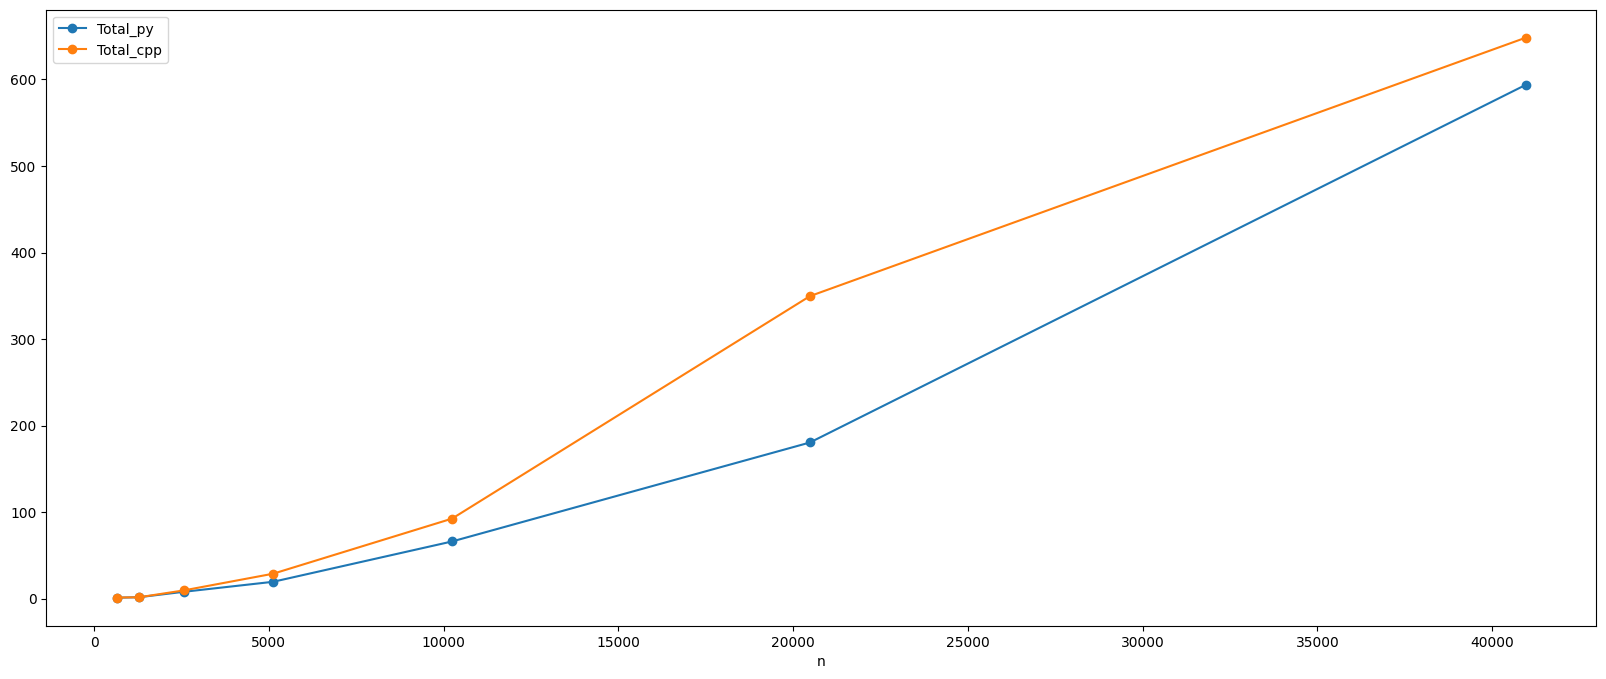

In [191]:
plot_column(comparison, ['Total_py', 'Total_cpp'], one_ax=True)

##### Compare partitionsComputation

In [192]:
comparison.filter(regex="Community computation")

,Community computation_py,Community computation_cpp
n,,
640,0.020755,0.011232
1280,0.054334,0.035937
2560,0.021359,0.057544
5120,0.249632,0.090647
10240,0.457549,0.172034
20480,0.588773,0.265604
40960,0.757963,0.386909


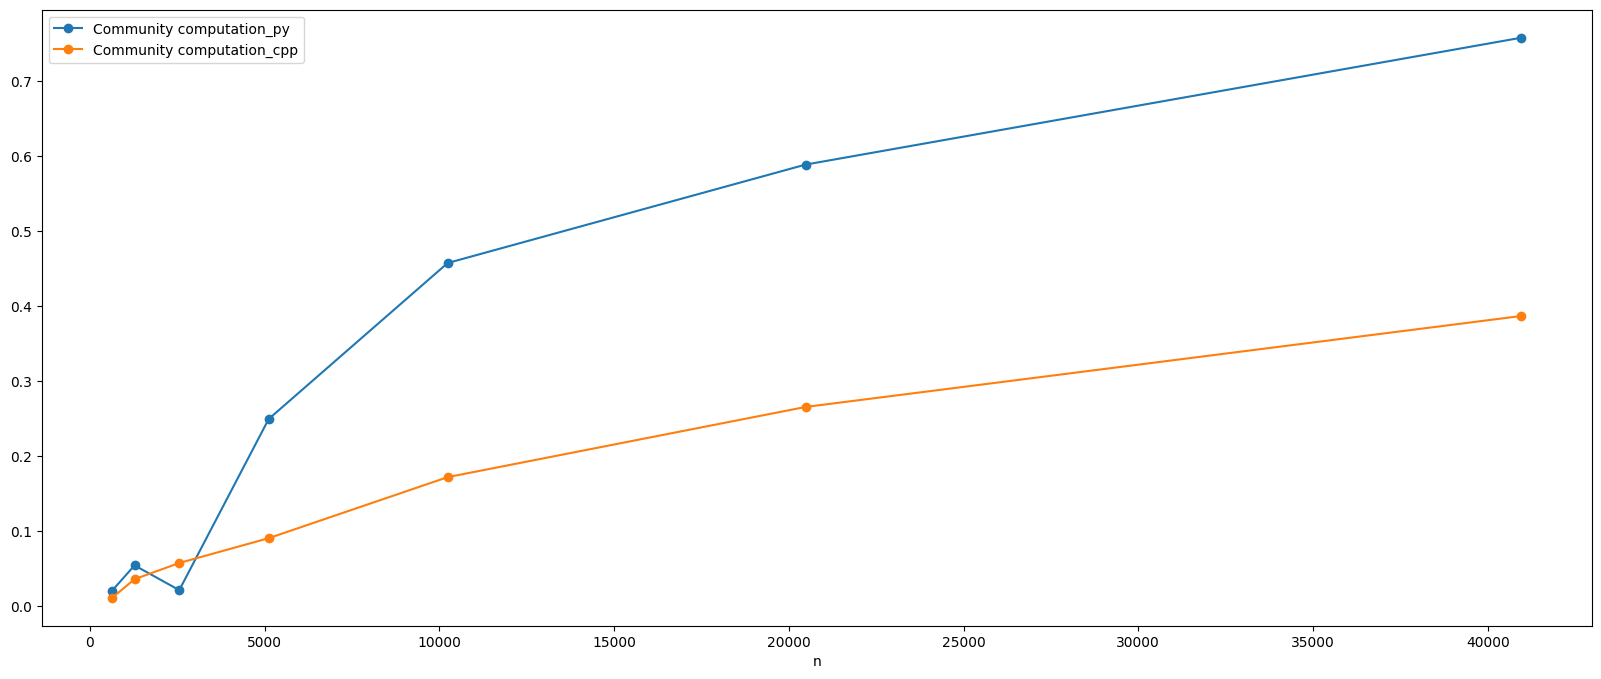

In [193]:
plot_column(comparison, ['Community computation_py', 'Community computation_cpp'], one_ax=True)

##### Compare nodesComputation

In [194]:
comparison.filter(regex="deltaNodesComputation")

,deltaNodesComputation_py,deltaNodesComputation_cpp
n,,
640,0.030346,0.035598
1280,0.170307,0.058270
2560,0.372787,0.084543
5120,0.561116,0.275916
10240,2.072425,0.462344
20480,7.077939,1.120295
40960,19.700940,3.956231


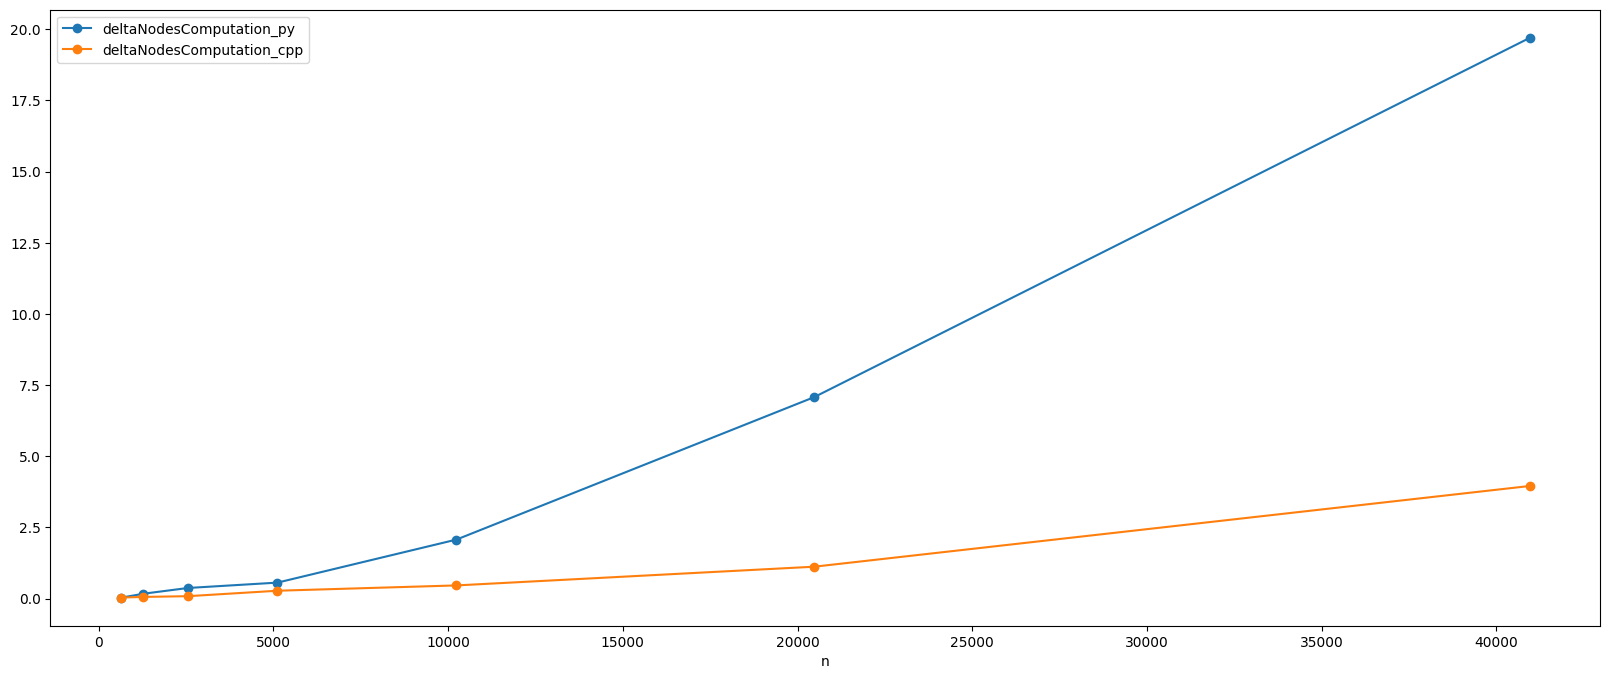

In [195]:
plot_column(comparison, ['deltaNodesComputation_py', 'deltaNodesComputation_cpp'], one_ax=True)

##### Compare deltaGLR

In [196]:
comparison.filter(regex="deltaGLR")

,deltaGLR_py,deltaGLR_cpp
n,,
640,1.008759,1.229430
1280,1.419136,1.469972
2560,7.492976,9.343578
5120,18.657394,28.437199
10240,63.546186,91.837308
20480,172.784326,348.211790
40960,573.242964,643.904615


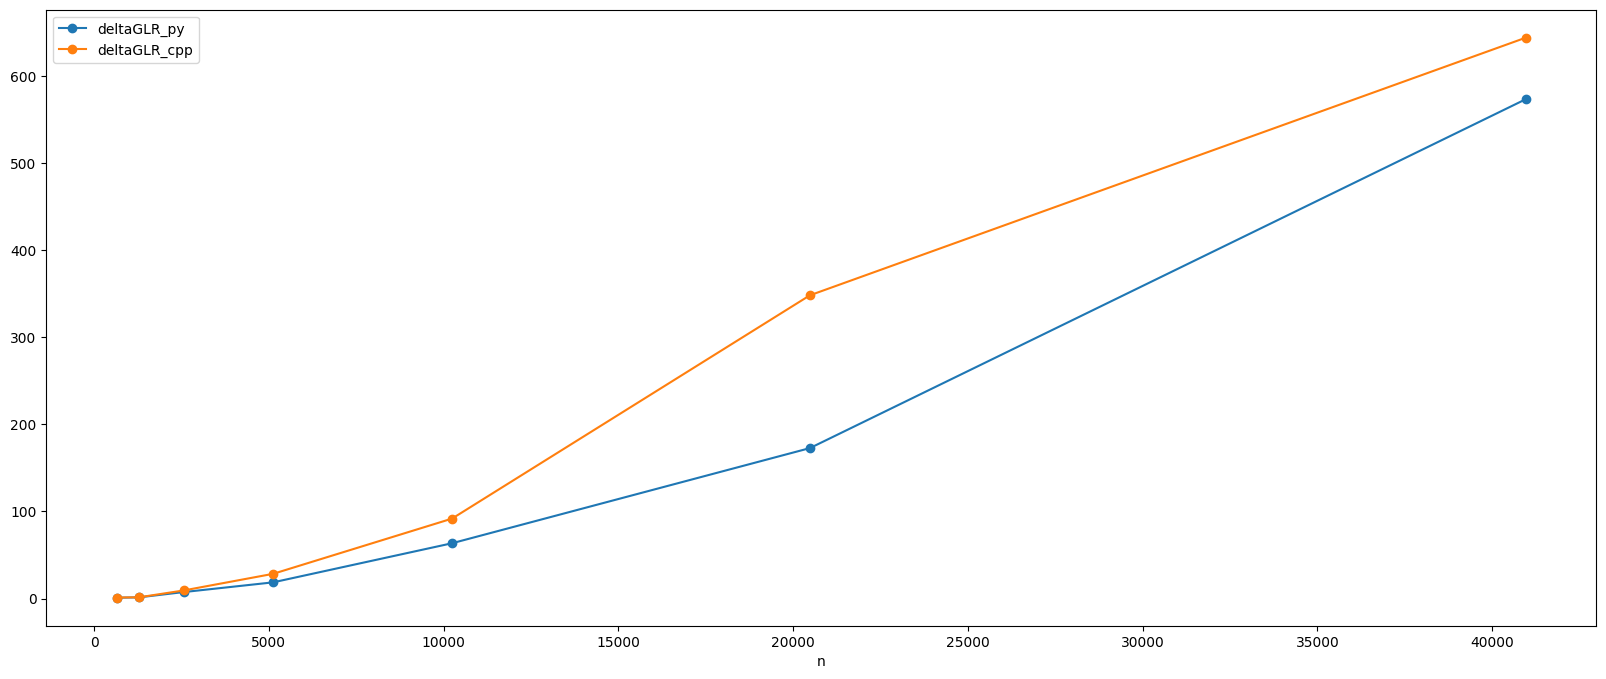

In [197]:
plot_column(comparison, ['deltaGLR_py', 'deltaGLR_cpp'], one_ax=True)

# Double Experiment (node doubled partition generated)

##### Filter results

In [198]:
dexpnode = all_data[ all_data["Flag"] == "2expnode"]
dexpnode = dexpnode[dexpnode["Code"] == programming_language]

##### Set number of nodes as ID

In [199]:
dexpnode.set_index("n", inplace=True)
dexpnode.sort_index(inplace=True)

##### Show total time

In [200]:
dexpnode[["Total"]]

,Total
n,
640,1.060017
1280,1.644040
2560,7.887537
5120,19.469360
10240,66.081450
20480,180.457450
40960,593.732502


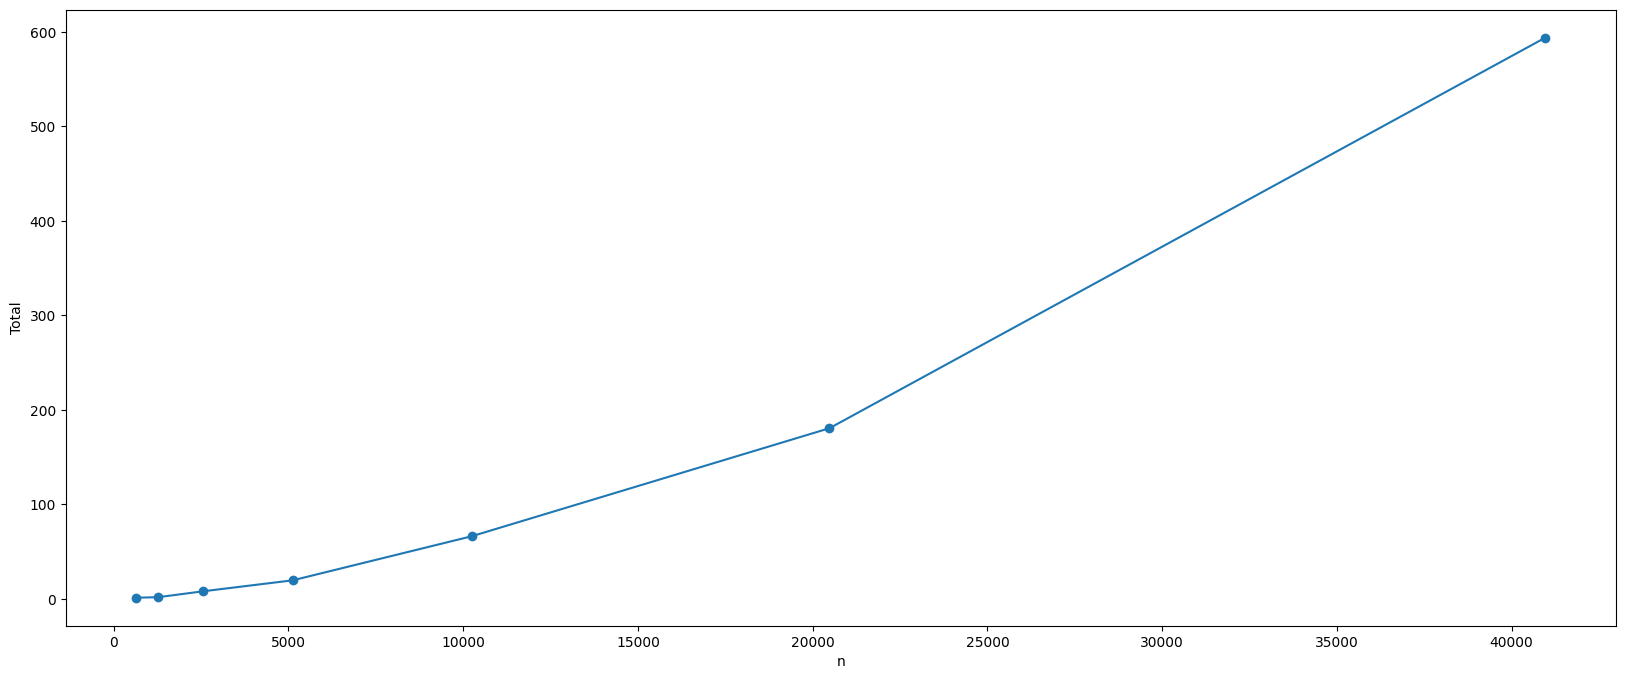

In [201]:
plot_column(dexpnode, ["Total"])

##### Show partitionsComputation

In [202]:
dexpnode[["Community computation"]]

,Community computation
n,
640,0.020755
1280,0.054334
2560,0.021359
5120,0.249632
10240,0.457549
20480,0.588773
40960,0.757963


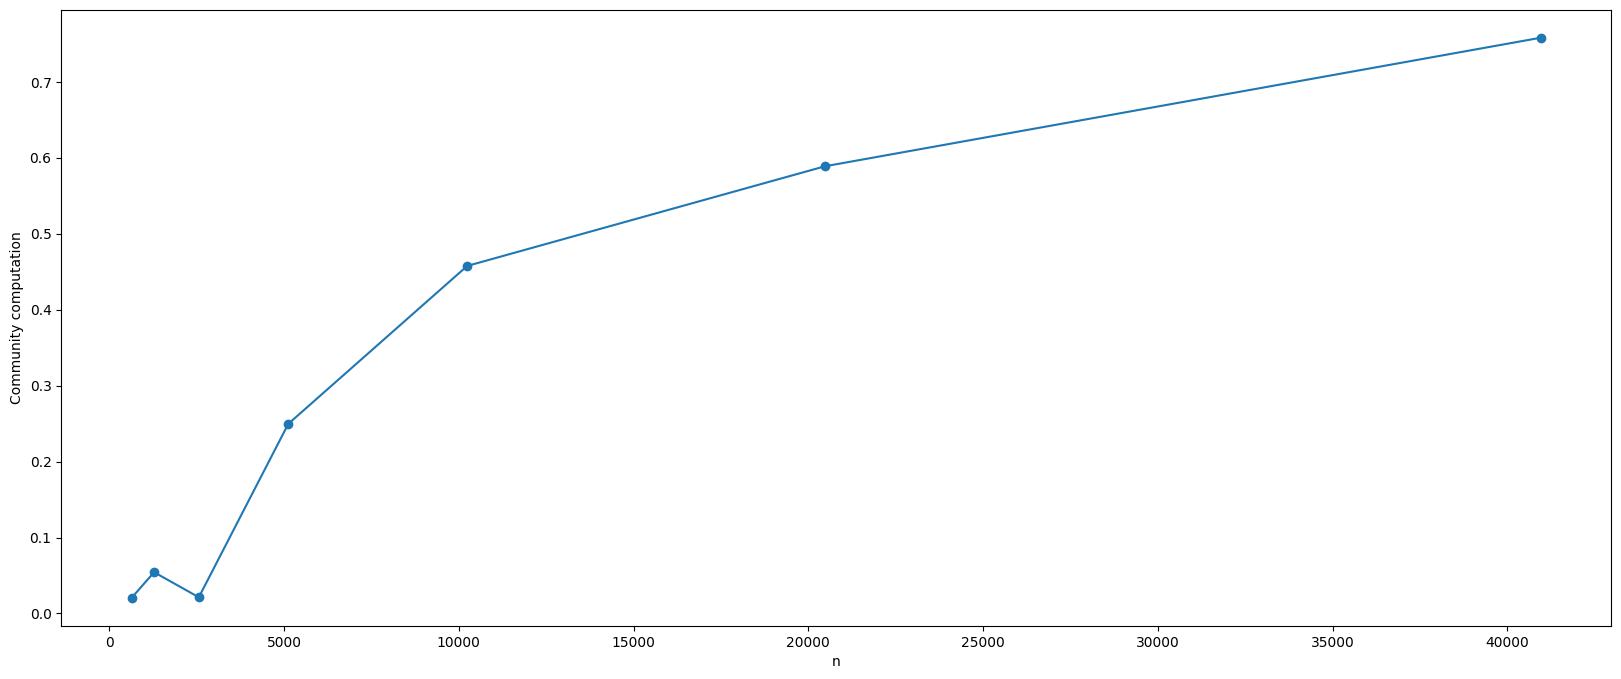

In [203]:
plot_column(dexpnode, ["Community computation"])

##### Show nodesComputation

In [204]:
dexpnode[["deltaNodesComputation"]]

,deltaNodesComputation
n,
640,0.030346
1280,0.170307
2560,0.372787
5120,0.561116
10240,2.072425
20480,7.077939
40960,19.700940


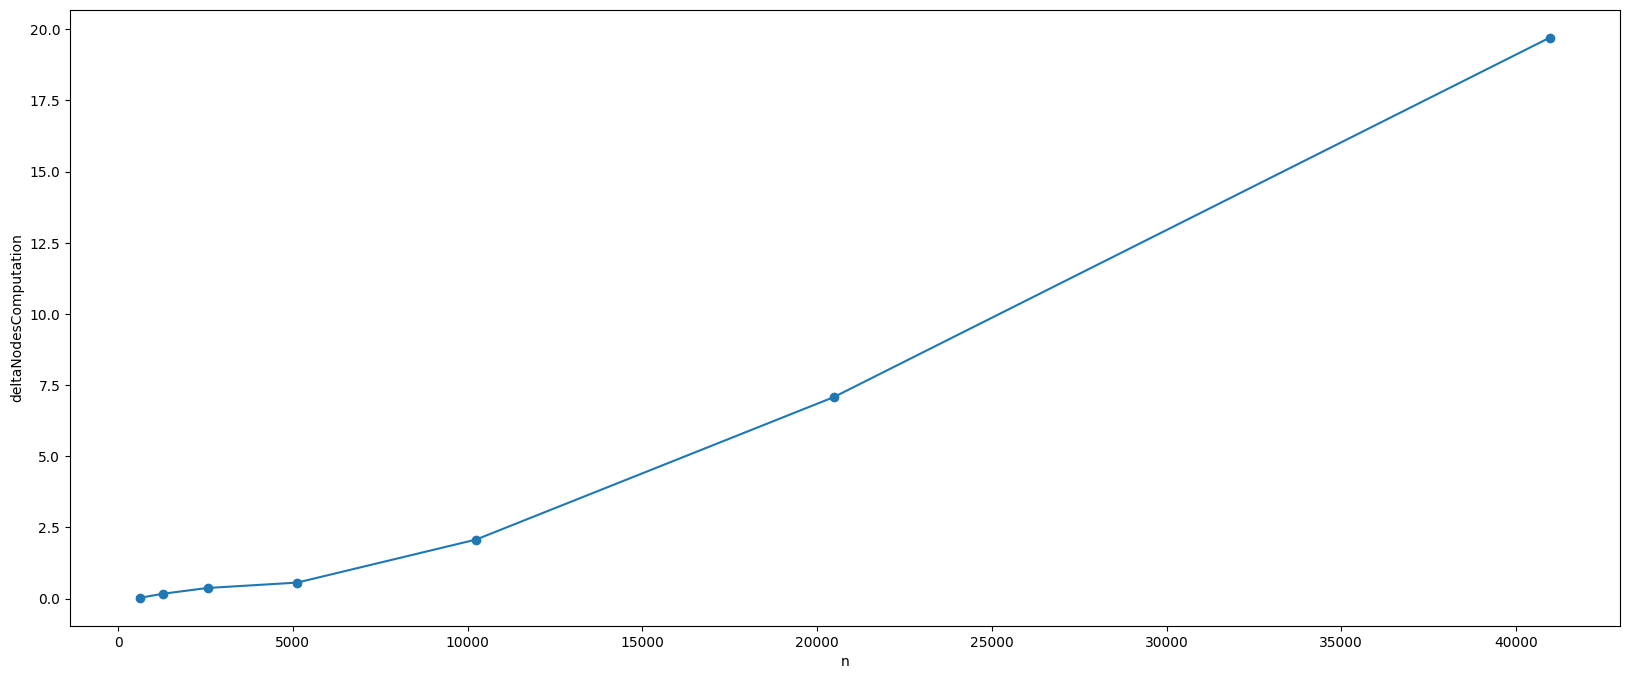

In [205]:
plot_column(dexpnode, ["deltaNodesComputation"])

##### Show deltaGLR

In [206]:
dexpnode[["deltaGLR"]]

,deltaGLR
n,
640,1.008759
1280,1.419136
2560,7.492976
5120,18.657394
10240,63.546186
20480,172.784326
40960,573.242964


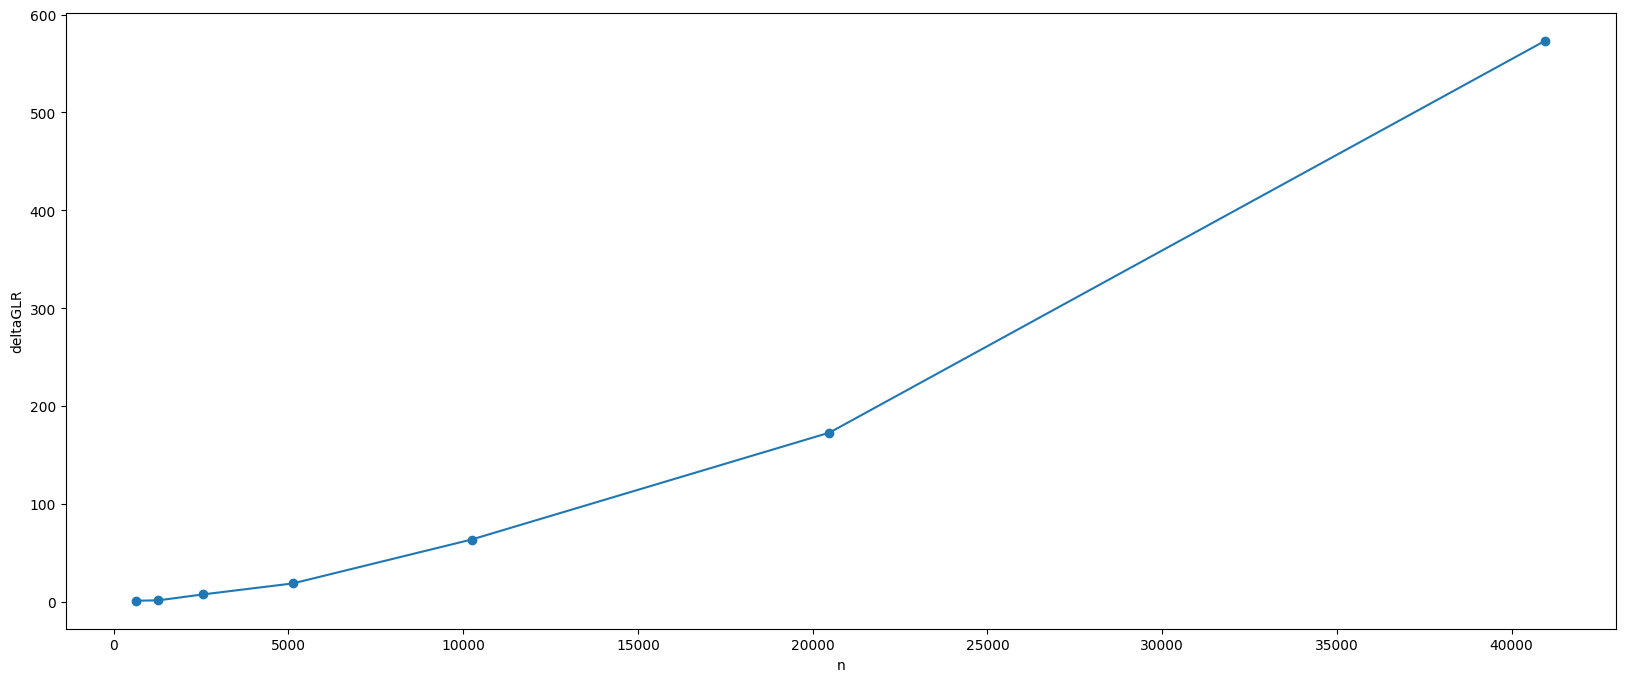

In [207]:
plot_column(dexpnode, ["deltaGLR"])

# Double Experiment (node with read partition)

##### Filter results

In [70]:
/
45dexpnode_readp = all_data[ all_data["Flag"] == "2expnode(readPartition)"]
dexpnode_readp = dexpnode_readp[dexpnode_readp["Code"] == programming_language]

##### Set number of nodes as ID

In [71]:
dexpnode_readp.set_index("n", inplace=True)
dexpnode_readp.sort_index(inplace=True)

##### Set number of community 

In [72]:
def numberOfCommunity(graph_name):
    partition_name = graph_name[:-len(".graph")]
    partition_path = f"../partial_results/partitions/{partition_name}"
    print(partition_path)
    partition_reader = BinaryPartitionReader()
    partition = partition_reader.read(partition_path)
    return partition.numberOfSubsets()

In [73]:
dexpnode_readp["#Community"] = dexpnode_readp["Graph"].apply(numberOfCommunity)
dexpnode_readp

../partial_results/partitions/2expnode(n=640, m=50000)
../partial_results/partitions/2expnode(n=1280, m=50000)
../partial_results/partitions/2expnode(n=2560, m=50000)
../partial_results/partitions/2expnode(n=5120, m=50000)
../partial_results/partitions/2expnode(n=10240, m=50000)
../partial_results/partitions/2expnode(n=20480, m=50000)
../partial_results/partitions/2expnode(n=40960, m=50000)


,Code,Graph,Flag,Community computation,Nodes computation,GLR computation,Total,m,deltaNodesComputation,deltaGLR,#Community
n,,,,,,,,,,,
640,python,"2expnode(n=640, m=50000).graph",2expnode(readPartition),0.031250,0.234375,1.390625,1.390625,50000,0.203125,1.156250,8
1280,python,"2expnode(n=1280, m=50000).graph",2expnode(readPartition),0.015625,0.281250,2.062500,2.062500,50000,0.265625,1.781250,8
2560,python,"2expnode(n=2560, m=50000).graph",2expnode(readPartition),0.062500,4.718750,12.281250,12.281250,50000,4.656250,7.562500,3
5120,python,"2expnode(n=5120, m=50000).graph",2expnode(readPartition),0.078125,2.656250,17.906250,17.906250,50000,2.578125,15.250000,12
10240,python,"2expnode(n=10240, m=50000).graph",2expnode(readPartition),0.015625,4.000000,46.406250,46.406250,50000,3.984375,42.406250,22
20480,python,"2expnode(n=20480, m=50000).graph",2expnode(readPartition),0.312500,19.328125,130.562500,130.562500,50000,19.015625,111.234375,22
40960,python,"2expnode(n=40960, m=50000).graph",2expnode(readPartition),0.328125,81.531250,434.953125,434.984375,50000,81.203125,353.421875,113


##### compute Total/#Community

In [74]:
dexpnode_readp["Total/#Community"] = dexpnode_readp["Total"] / dexpnode_readp["#Community"]
dexpnode_readp[["#Community", "Total", "Total/#Community"]]

,#Community,Total,Total/#Community
n,,,
640,8,1.390625,0.173828
1280,8,2.062500,0.257812
2560,3,12.281250,4.093750
5120,12,17.906250,1.492188
10240,22,46.406250,2.109375
20480,22,130.562500,5.934659
40960,113,434.984375,3.849419


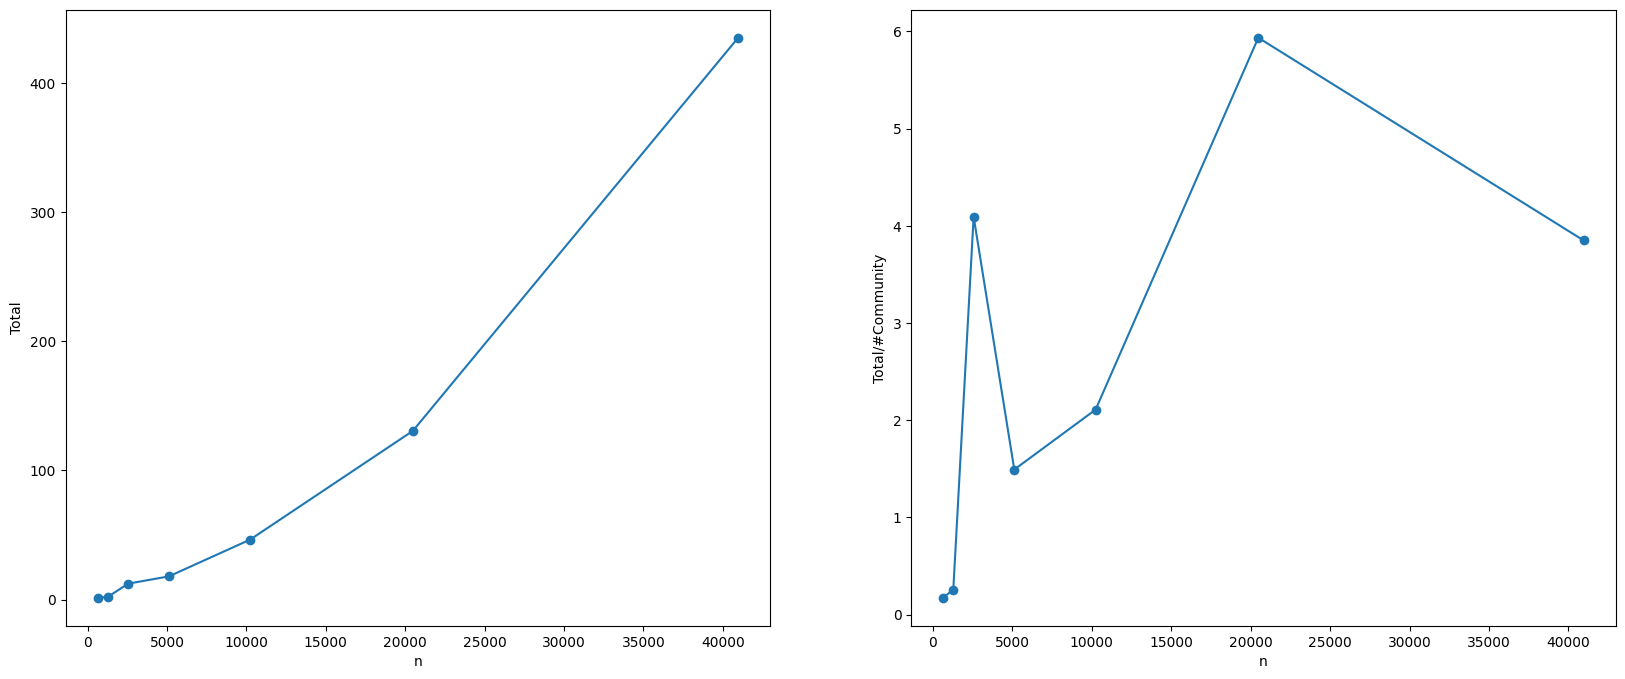

In [89]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.set_ylabel("Total")
ax2.set_ylabel("Total/#Community")
dexpnode_readp["Total"].plot(marker="o", ax=ax1)
dexpnode_readp["Total/#Community"].plot(marker="o", ax=ax2)
plt.show()

##### Compute nodesComputation/#Community

In [90]:
dexpnode_readp["deltaNodesComputation/#Community"] = dexpnode_readp["deltaNodesComputation"] / dexpnode_readp["#Community"]
dexpnode_readp[["#Community", "deltaNodesComputation", "deltaNodesComputation/#Community"]]

,#Community,deltaNodesComputation,deltaNodesComputation/#Community
n,,,
640,8,0.203125,0.025391
1280,8,0.265625,0.033203
2560,3,4.656250,1.552083
5120,12,2.578125,0.214844
10240,22,3.984375,0.181108
20480,22,19.015625,0.864347
40960,113,81.203125,0.718612


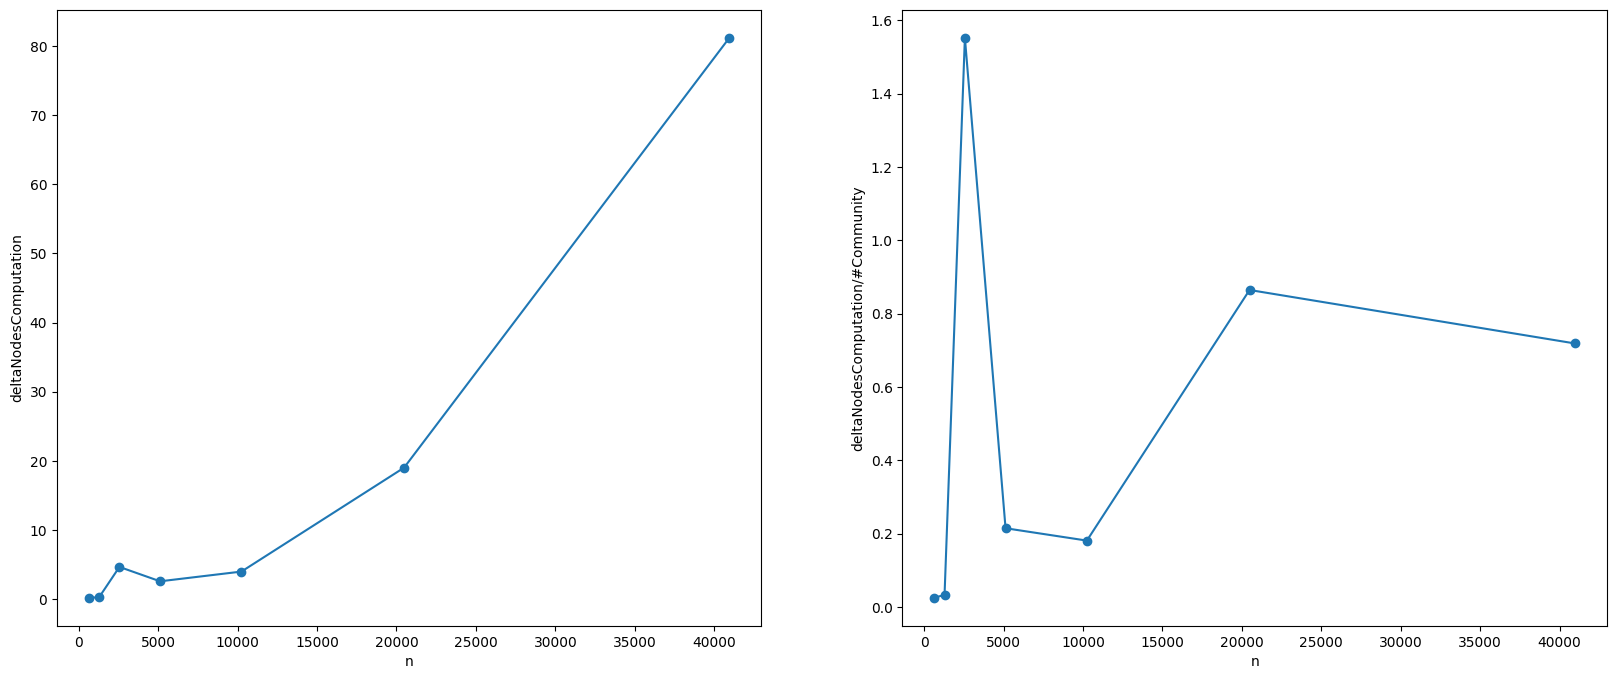

In [91]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.set_ylabel("deltaNodesComputation")
ax2.set_ylabel("deltaNodesComputation/#Community")
dexpnode_readp["deltaNodesComputation"].plot(marker="o", ax=ax1)
dexpnode_readp["deltaNodesComputation/#Community"].plot(marker="o", ax=ax2)
plt.show()

##### Compute deltaGLR/#Community

In [93]:
dexpnode_readp["deltaGLR/#Community"] = dexpnode_readp["deltaGLR"] / dexpnode_readp["#Community"]
dexpnode_readp[["#Community", "deltaGLR", "deltaGLR/#Community"]]

,#Community,deltaGLR,deltaGLR/#Community
n,,,
640,8,1.156250,0.144531
1280,8,1.781250,0.222656
2560,3,7.562500,2.520833
5120,12,15.250000,1.270833
10240,22,42.406250,1.927557
20480,22,111.234375,5.056108
40960,113,353.421875,3.127627


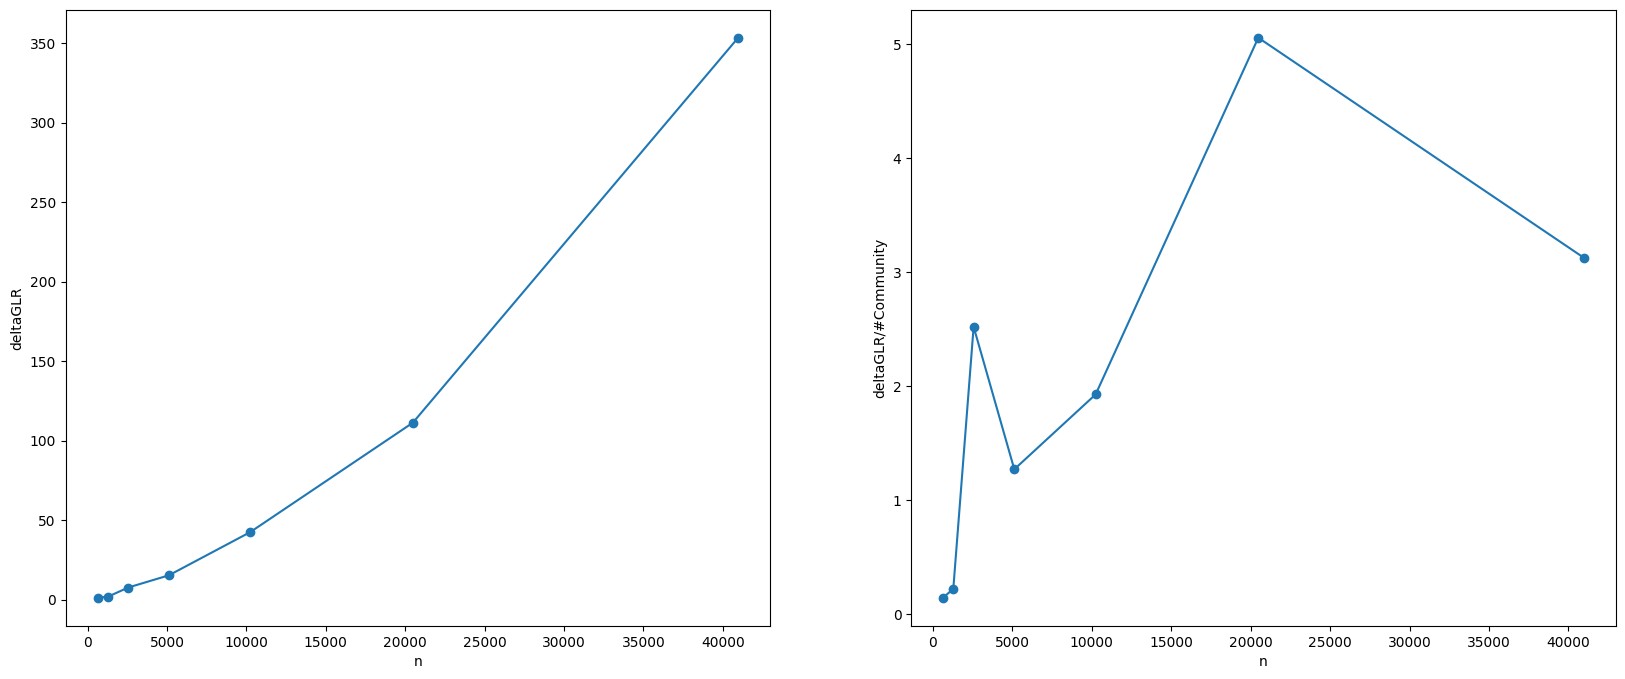

In [94]:
_, (ax1, ax2) = plt.subplots(1,2, figsize=(20,8))
ax1.set_ylabel("deltaGLR")
ax2.set_ylabel("deltaGLR/#Community")
dexpnode_readp["deltaGLR"].plot(marker="o", ax=ax1)
dexpnode_readp["deltaGLR/#Community"].plot(marker="o", ax=ax2)
plt.show()